In [62]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('mapdata.csv', header=[0, 1], sep=";", low_memory=False)
data.head()

X           Y   T_AVG_EH                                   \
    CoordX_SM   CoordY_SM  1990-1994  1995-1999  2000-2004  2005-2009   
0  500238.433  9757716.35  26.241653  26.431744  26.205169  25.623458   
1  501238.433  9756716.35  26.276430  26.472976  26.248354  25.640990   
2  501238.433  9757716.35  26.250309  26.445153  26.217235  25.670272   
3  502238.433  9755716.35  26.298148  26.500389  26.276984  25.684519   
4  502238.433  9756716.35  26.296136  26.498092  26.272711  25.661937   

               T_AVG_ES                        ...   T_MIN_EH             \
   2010-2013  1990-1994  1995-1999  2000-2004  ...  1990-1994  1995-1999   
0  25.500149  23.211798  24.921022  24.136960  ...  22.750114  20.888282   
1  25.518365  23.216478  24.946658  24.158758  ...  21.400455  20.931939   
2  25.504583  23.234939  24.930630  24.147188  ...  21.603656  20.914635   
3  25.562800  23.233070  24.963670  24.173251  ...  21.458458  20.963566   
4  25.540316  23.227812  24.963483  24.168645  ...  21.813207  20.968519   

                                     T_MIN_ES                        \
   2000-2004  2005-2009  2010-2013  1990-1994  1995-1999  2000-2004   
0  21.299084  21.074153  20.003842  18.715838  18.442846  17.972751   
1  21.344305  21.115768  20.045958  18.743299  18.475342  18.006228   
2  21.319373  21.094308  20.030165  18.731016  18.466860  17.996674   
3  21.377115  21.145678  20.076691  18.761481  18.500737  18.031218   
4  21.375084  21.145874  20.082033  18.766453  18.505476  18.029859   

                         
   2005-2009  2010-2013  
0  19.400676  17.865228  
1  19.436622  17.895014  
2  19.418912  17.885806  
3  19.460895  17.914714  
4  19.464830  17.924371  

[5 rows x 32 columns]

<Axes: >

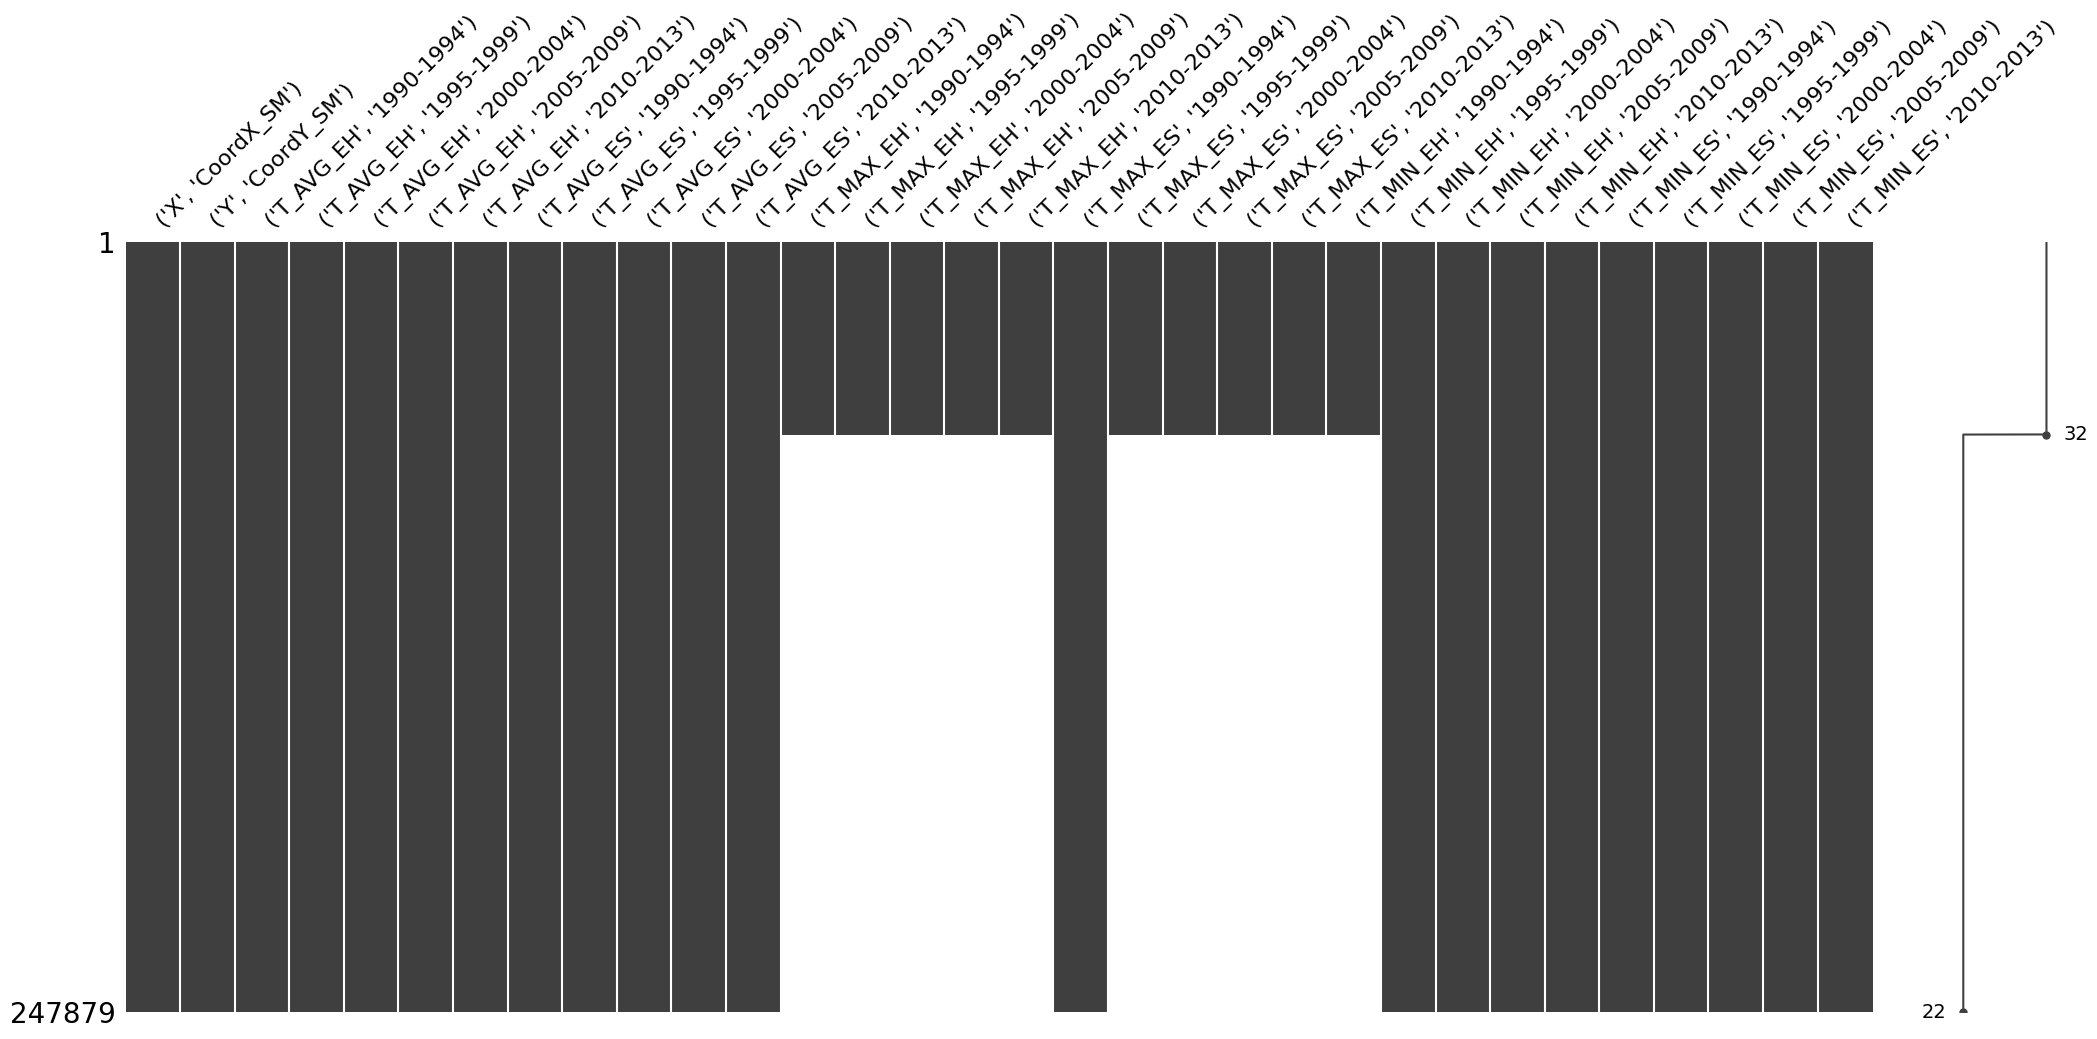

In [29]:
msno.matrix(data)

In [94]:
data.isnull().sum()

X         CoordX_SM         0
Y         CoordY_SM         0
T_AVG_EH  1990-1994         0
          1995-1999         0
          2000-2004         0
          2005-2009         0
          2010-2013         0
T_AVG_ES  1990-1994         0
          1995-1999         0
          2000-2004         0
          2005-2009         0
          2010-2013         0
T_MAX_EH  1990-1994    185893
          1995-1999    185893
          2000-2004    185893
          2005-2009    185893
          2010-2013    185893
T_MAX_ES  1990-1994         0
          1995-1999    185893
          2000-2004    185893
          2005-2009    185893
          2010-2013    185893
T_MIN_EH  1990-1994    185893
          1995-1999         0
          2000-2004         0
          2005-2009         0
          2010-2013         0
T_MIN_ES  1990-1994         0
          1995-1999         0
          2000-2004         0
          2005-2009         0
          2010-2013         0
dtype: int64

In [111]:
var_cols = ['T_AVG_EH', 'T_AVG_ES', 'T_MAX_EH', 'T_MAX_ES', 'T_MIN_EH', 'T_MIN_ES']
var_cols = ['T_AVG_EH', 'T_AVG_ES', 'T_MIN_ES']

In [112]:
years = np.array([int(year[-4:]) for year in data[var_cols[0]].columns])
years

array([1994, 1999, 2004, 2009, 2013])

In [115]:
years_to_predict = np.concatenate((years, [years[-1] + 5]))

for i in range(3):
    dt = data[var_cols[i]].copy()
    slopes = []
    next_5 = []
    for index, row in dt.iterrows():
        reg = LinearRegression().fit(years.reshape(-1, 1), row.values)
        slopes += [reg.coef_[0]]
        next_5 += [years_to_predict[-1]*reg.coef_[0]+reg.intercept_]
    dt['slope'] = slopes
    dt['prediction'] = next_5
    dt['CoordX_SM'] = data['X']['CoordX_SM']
    dt['CoordY_SM'] = data['Y']['CoordY_SM']
    dt = dt[['CoordX_SM', 'CoordY_SM', '1990-1994', '1995-1999', 
             '2000-2004', '2005-2009', '2010-2013', 'slope', 'prediction']]
    dt.to_csv(var_cols[i]+'.csv', index=False)
    print(var_cols[i])

T_AVG_EH
T_AVG_ES
T_MIN_ES


In [90]:
# DO FOR ALL DATASET 
dt = data[var_cols[0]].copy()
dt.head()

,1990-1994,1995-1999,2000-2004,2005-2009,2010-2013
0,26.241653,26.431744,26.205169,25.623458,25.500149
1,26.276430,26.472976,26.248354,25.640990,25.518365
2,26.250309,26.445153,26.217235,25.670272,25.504583
3,26.298148,26.500389,26.276984,25.684519,25.562800
4,26.296136,26.498092,26.272711,25.661937,25.540316


In [87]:
years_to_predict = np.concatenate((years, [years[-1] + 5]))

slopes = []
next_5 = []
for index, row in dt.iterrows():
    reg = LinearRegression().fit(years.reshape(-1, 1), row.values)
    slopes += [reg.coef_[0]]
    next_5 += [years_to_predict[-1]*reg.coef_[0]+reg.intercept_]

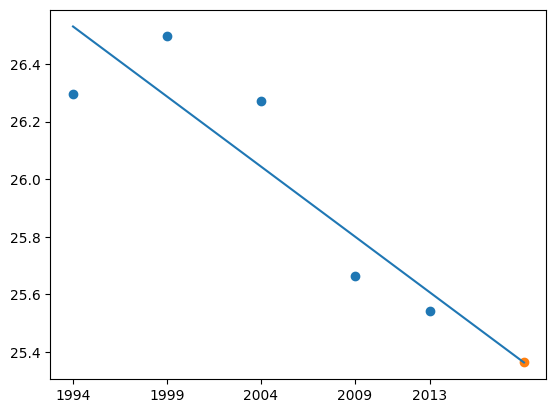

In [82]:
plt.scatter(years, row)
predicted_line = years_to_predict*reg.coef_[0]+reg.intercept_
plt.plot(years_to_predict, predicted_line)
plt.scatter(years_to_predict[-1], predicted_line[-1])
plt.xticks(years)

In [106]:
dt['slope'] = slopes
dt['prediction'] = next_5
dt['CoordX_SM'] = data['X']['CoordX_SM']
dt['CoordY_SM'] = data['Y']['CoordY_SM']
dt = dt[['CoordX_SM', 'CoordY_SM', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2013',
       'slope', 'prediction']]
dt.head()

,CoordX_SM,CoordY_SM,1990-1994,1995-1999,2000-2004,2005-2009,2010-2013,slope,prediction
0,500238.433,9757716.35,26.241653,26.431744,26.205169,25.623458,25.500149,-0.047470,25.326355
1,501238.433,9756716.35,26.276430,26.472976,26.248354,25.640990,25.518365,-0.048646,25.340648
2,501238.433,9757716.35,26.250309,26.445153,26.217235,25.670272,25.504583,-0.046875,25.351886
3,502238.433,9755716.35,26.298148,26.500389,26.276984,25.684519,25.562800,-0.047362,25.392033
4,502238.433,9756716.35,26.296136,26.498092,26.272711,25.661937,25.540316,-0.048637,25.363191


In [107]:
i = 0
var_cols[i]+'.csv'
dt.to_csv(var_cols[i]+'.csv', index=False)

In [99]:
i = 0
var_cols[i]+'.csv'

'T_AVG_EH.csv'

In [103]:
data['Y']['CoordY_SM']

0         9757716.35
1         9756716.35
2         9757716.35
3         9755716.35
4         9756716.35
             ...    
247874    9892716.35
247875    9893716.35
247876    9891716.35
247877    9892716.35
247878    9891716.35
Name: CoordY_SM, Length: 247879, dtype: float64